In [3]:
try:
    import pandas as pd
    import numpy as np
    import tensorflow as tf
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    import plotly.express as px
    import os
except:
    print(f"Error importing one or more libraries: {e}")
    print("Please make sure you have installed the required packages.")
    print("You can install them using pip:")
    print("pip install pandas numpy tensorflow seaborn matplotlib")
    exit()

In [5]:
current_directory=os.getcwd()
print(current_directory)

d:\DATASCIENCE\creditcardfraud\credit_card_fraud_detection\notebooks


In [6]:
file_path_relative = r"..\data\raw\creditcard.csv"
try:
    df=pd.read_csv(file_path_relative)
    print('Loaded')
except FileNotFoundError:
    print(f"Error : Not found at {file_path_relative}")

Loaded


In [9]:
df.sample(10)

Time        V1        V2        V3        V4        V5        V6  \
238187  149565.0  2.209086 -1.083023 -1.431488 -2.058311 -1.019095 -1.584863   
136624   81795.0 -2.839818  2.174802  1.427129 -2.251636  0.489293 -0.432383   
186752  127241.0  2.151418  0.102523 -2.253217 -0.053366  0.665833 -1.400936   
124869   77453.0  1.108684 -0.657965  0.740069 -0.003755 -0.847715  0.413873   
151033   94414.0 -0.180844  0.674728  1.060988 -0.307072  0.202668  0.035887   
240878  150790.0 -1.028209  0.882788  0.270054 -2.642433  0.585701 -0.887873   
172044  120929.0  0.027876 -0.783234  1.148298 -1.358702 -0.687958  1.172912   
67585    52607.0  1.174471  0.659680  0.455271  2.717967  0.066368  0.006332   
227964  145302.0  1.857242 -1.329055 -0.506401 -0.922117 -0.680206  0.759117   
212246  138779.0 -0.812600 -1.809053  0.135408 -1.481394 -1.408468  1.618018   

              V7        V8        V9  ...       V21       V22       V23  \
238187 -0.410522 -0.410150  0.839435  ... -0.057741  0.591423 -0.009104   
136624  1.867602 -1.478131  3.068685  ... -0.551067  0.135111 -0.224494   
186752  0.722069 -0.495409  0.270990  ...  0.131512  0.472927 -0.003488   
124869 -0.725648  0.265621  1.072508  ... -0.205425 -0.525077 -0.082265   
151033  0.275245  0.031766  1.591227  ... -0.213896 -0.351803  0.108243   
240878  0.899659  0.232192  0.063361  ... -0.241635 -0.776911 -0.022143   
172044  0.022152  0.128150 -0.301018  ...  0.146865  0.496241  0.374983   
67585  -0.068755  0.051024 -0.262203  ... -0.457054 -1.193550  0.067647   
227964 -1.146195  0.226639 -0.058747  ...  0.549084  1.609382  0.132948   
212246  1.487482  0.248854 -0.688103  ...  0.262202 -0.097634  1.527484   

             V24       V25       V26       V27       V28  Amount  Class  
238187  0.083263  0.245883  0.093224  0.009365 -0.059848   15.17      0  
136624  0.186201 -0.381684  0.402903 -1.930092 -1.943004    0.75      0  
186752  0.777186  0.448123  0.209212 -0.093770 -0.073825    0.77      0  
124869 -0.433660  0.176683  0.971790 -0.053352  0.005228   69.34      0  
151033 -0.612060 -1.195609 -0.761619  0.111659  0.209868   23.42      0  
240878  0.731316 -0.159081  0.282389 -0.211957 -0.130904    1.00      0  
172044  0.210123 -1.122834 -0.419874  0.065207  0.016205  150.00      0  
67585  -0.279046  0.332835 -0.242235  0.031789  0.051573    3.80      0  
227964 -0.959703 -0.423690  0.018859  0.060527 -0.038533   99.00      0  
212246 -1.151522 -0.752346 -0.564423 -0.054301  0.079107  539.11      0  

[10 rows x 31 columns]

In [20]:
df.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  
5  0.105915  0.253844  0.081080    3.67      0  
6 -0.257237  0.034507  0.005168    4.99      0  
7 -0.051634 -1.206921 -1.085339   40.80      0  
8 -0.384157  0.011747  0.142404   93.20      0  
9  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 31 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

#### For certain columns, the diff between 75% and max is quite high, so we will have to check for outliers for them (Since we dont wanna loose important data, i will only check for cols who are more correlayed)

In [15]:
target_count=df['Class'].value_counts()

class_percentages = df['Class'].value_counts(normalize=True) * 100

print(f"Class 0 Percentage: {class_percentages[0]:.5f}%")
print(f"Class 1 Percentage: {class_percentages[1]:.5f}%")


Class 0 Percentage: 99.82725%
Class 1 Percentage: 0.17275%


In [17]:
fig_bar = px.histogram(df, x="Class", title="Distribution of Class (Plotly Bar)")
fig_bar.show()

In [18]:
fig_pie = px.pie(df, names="Class", title="Distribution of Class (Plotly Pie)")
fig_pie.show()

#### Conclusion One-> The non-fraud transactions are too much compared to the draud transactions,
#### Even if I train a model, since non-fraud are too much, it will be biased towards non-fraud transactions. and accuracy>99

In [21]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

### The above represents transactions made over 2 days, from 0 th second to 172972 second in time, and corresponding values

In [23]:
print(df.groupby('Class')['Amount'].describe())

          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


In [28]:
df_fraudulent = df[df['Class'] == 1][['Amount', 'Class']]  # Double brackets for DataFrame
print(df_fraudulent)

        Amount  Class
541       0.00      1
623     529.00      1
4920    239.93      1
6108     59.00      1
6329      1.00      1
...        ...    ...
279863  390.00      1
280143    0.76      1
280149   77.89      1
281144  245.00      1
281674   42.53      1

[492 rows x 2 columns]


In [30]:
print(df_fraudulent['Amount'].max())
print(df_fraudulent['Amount'].min())
print(df_fraudulent['Amount'].mean())

2125.87
0.0
122.21132113821139


In [31]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
df.duplicated().sum()

1081

In [34]:
df[df.duplicated()].groupby('Class').size()


Class
0    1062
1      19
dtype: int64

In [36]:
print(df[df.duplicated(keep=False)])


            Time        V1        V2        V3        V4        V5        V6  \
32          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284190  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284192  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

In [37]:
df = df[~(df.duplicated() & (df['Class'] == 0))]


In [38]:
df.duplicated().sum()

19

#### Dropped the non-fraud duplicate transactions

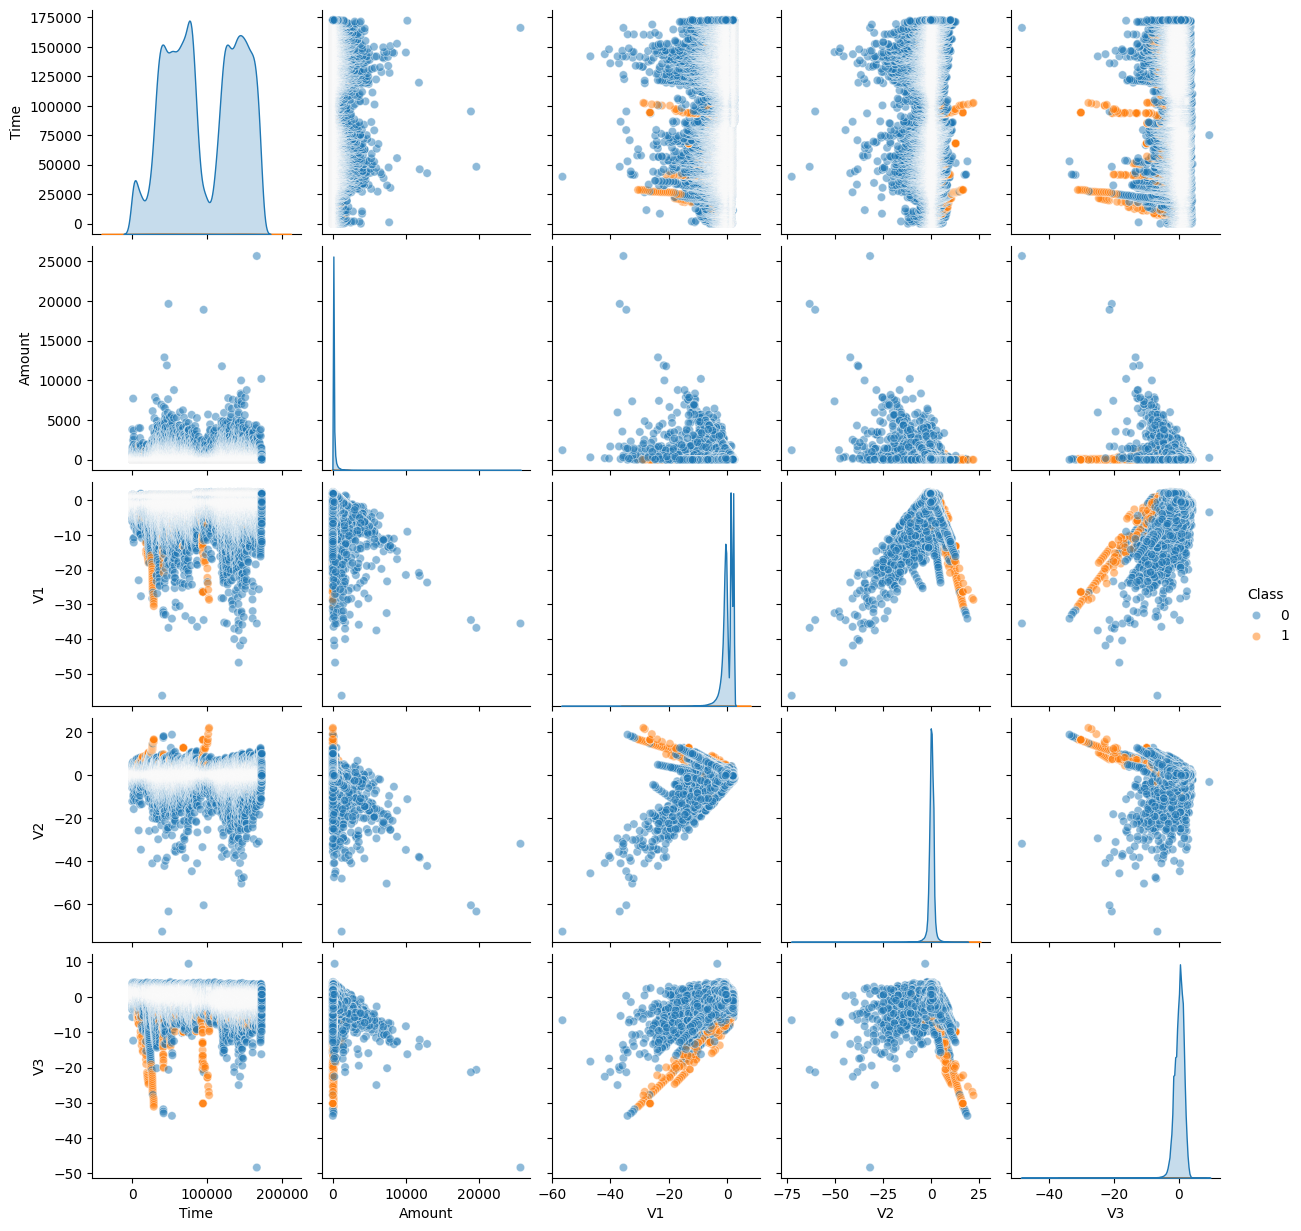

In [39]:
selected_features = ['Time', 'Amount', 'V1', 'V2', 'V3', 'Class']
sns.pairplot(df[selected_features], hue='Class', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

#### Separately we can see like class is individually dependent on most of them from them we can see certain feeatures
- Most of the amount is between 0 to some small value 100 etc.(Euros, Dollars etc.)
- Some of the amount is great as intepreted in df.info() ref

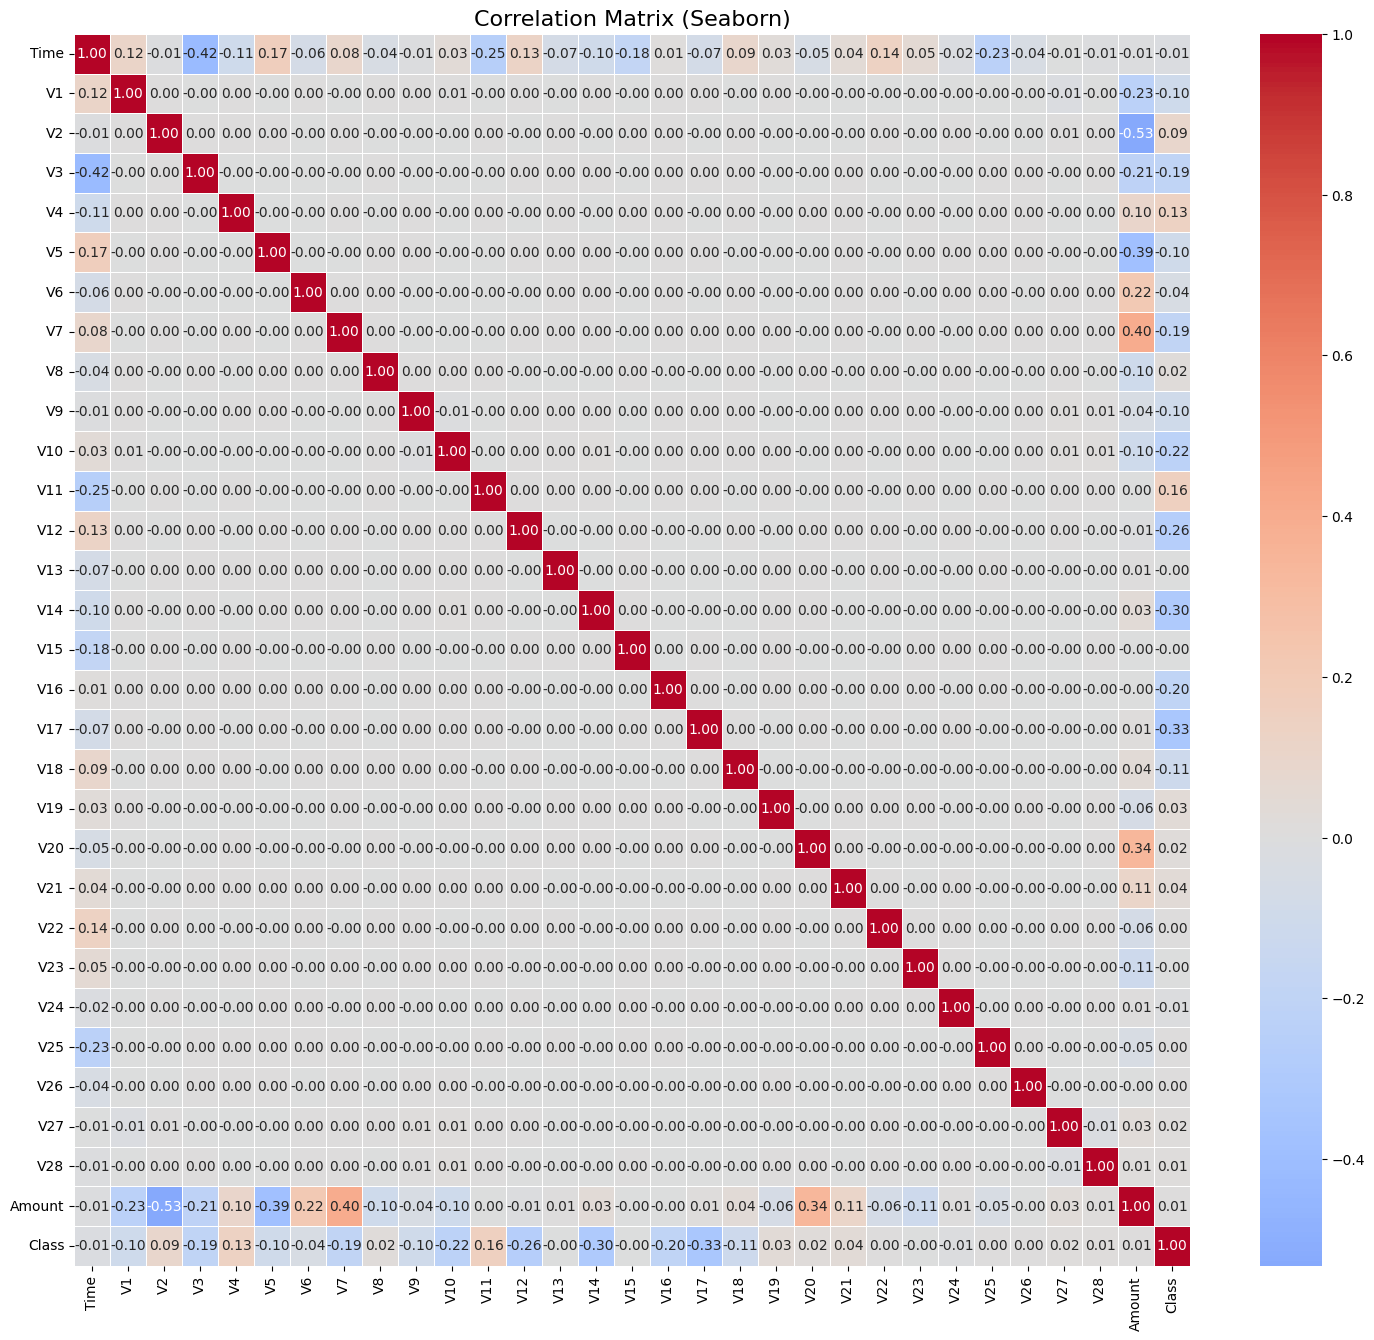

In [48]:
correlation_matrix = df.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix (Seaborn)', fontsize=16)
plt.show()

#### A correlation matrix interprets
- +1 both features move in same direction
- -1 different direction

In [50]:
for col in correlation_matrix.columns:
    if col != 'Class': 
        correlation_value = correlation_matrix.loc[col, 'Class']
        print(f"Correlation of {col} with Class is {correlation_value:.4f}")

Correlation of Time with Class is -0.0123
Correlation of V1 with Class is -0.1020
Correlation of V2 with Class is 0.0917
Correlation of V3 with Class is -0.1935
Correlation of V4 with Class is 0.1338
Correlation of V5 with Class is -0.0953
Correlation of V6 with Class is -0.0437
Correlation of V7 with Class is -0.1878
Correlation of V8 with Class is 0.0200
Correlation of V9 with Class is -0.0981
Correlation of V10 with Class is -0.2187
Correlation of V11 with Class is 0.1553
Correlation of V12 with Class is -0.2611
Correlation of V13 with Class is -0.0046
Correlation of V14 with Class is -0.3038
Correlation of V15 with Class is -0.0043
Correlation of V16 with Class is -0.1969
Correlation of V17 with Class is -0.3273
Correlation of V18 with Class is -0.1117
Correlation of V19 with Class is 0.0349
Correlation of V20 with Class is 0.0201
Correlation of V21 with Class is 0.0405
Correlation of V22 with Class is 0.0008
Correlation of V23 with Class is -0.0027
Correlation of V24 with Class is

- ince the dataset is highly imbalanced (1:99 fraud to non-fraud), a feature that has high predictive power for fraud cases might show low correlation overall because non-fraud cases dominate the dataset.
- so separate correlation might be helpful?

In [51]:
fraud_corr = df[df['Class'] == 1].corr()
non_fraud_corr = df[df['Class'] == 0].corr()

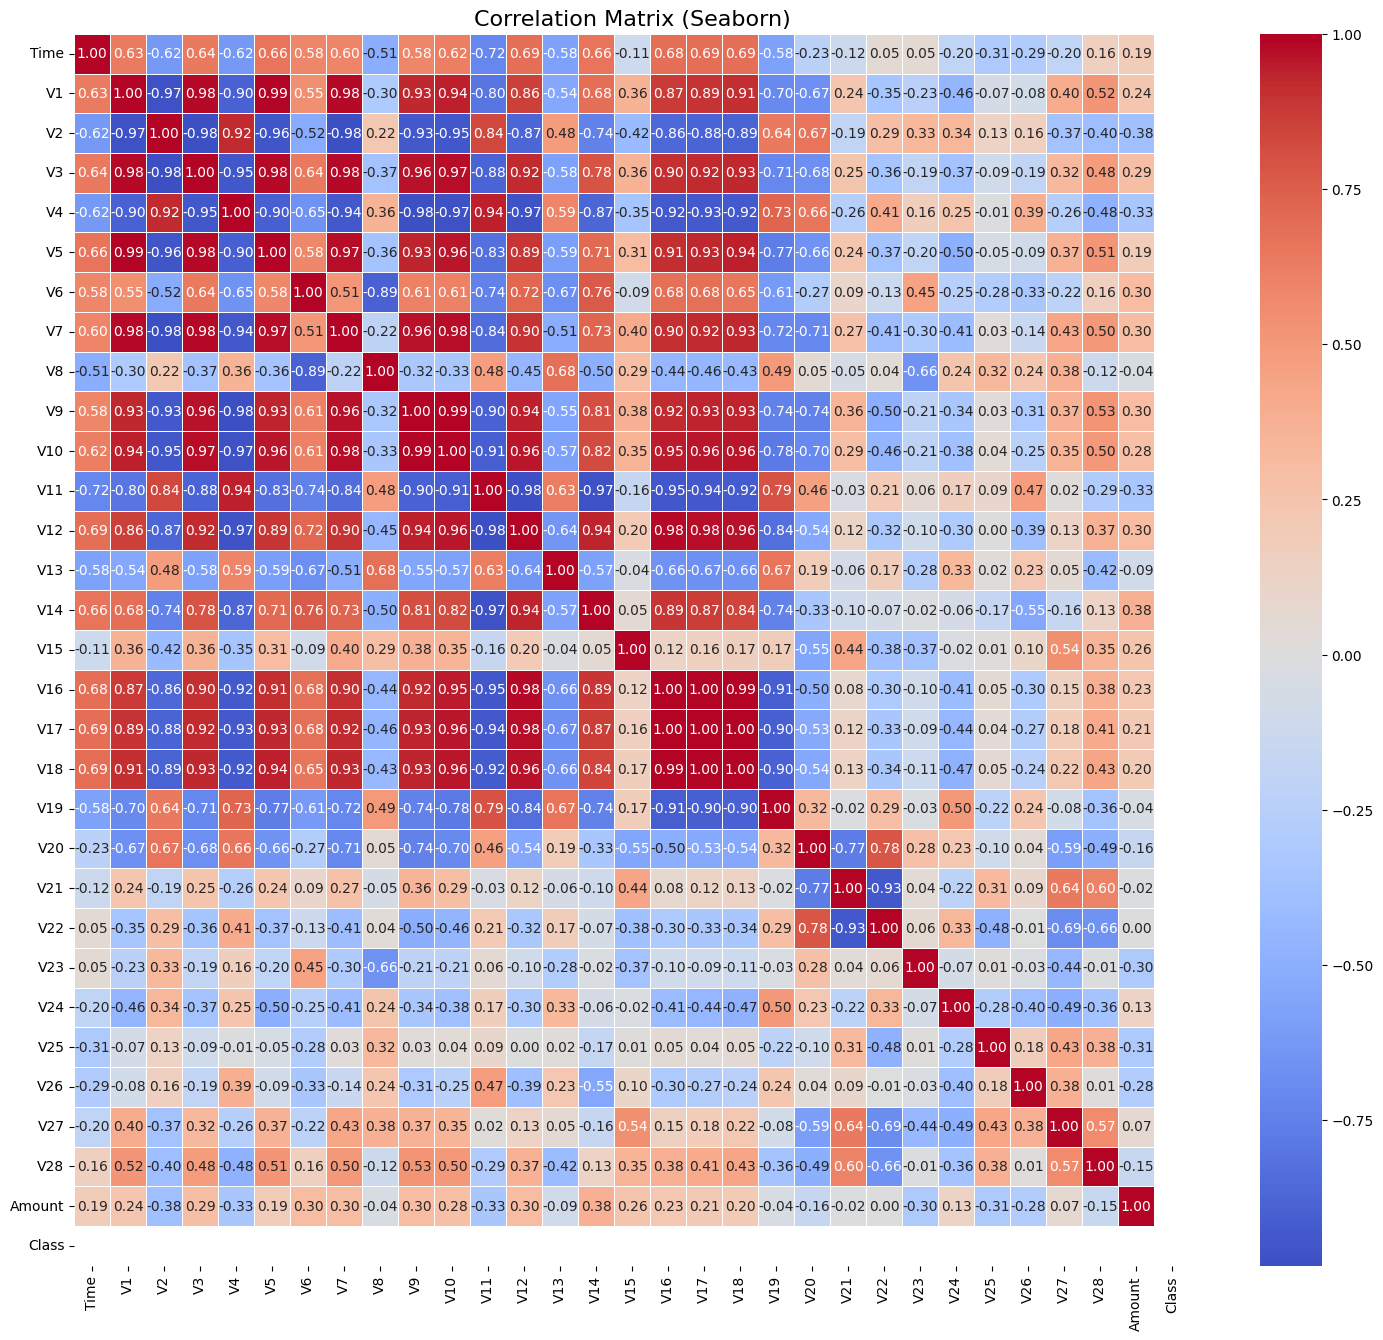

In [52]:
correlation_matrix = fraud_corr.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix (Seaborn)', fontsize=16)
plt.show()

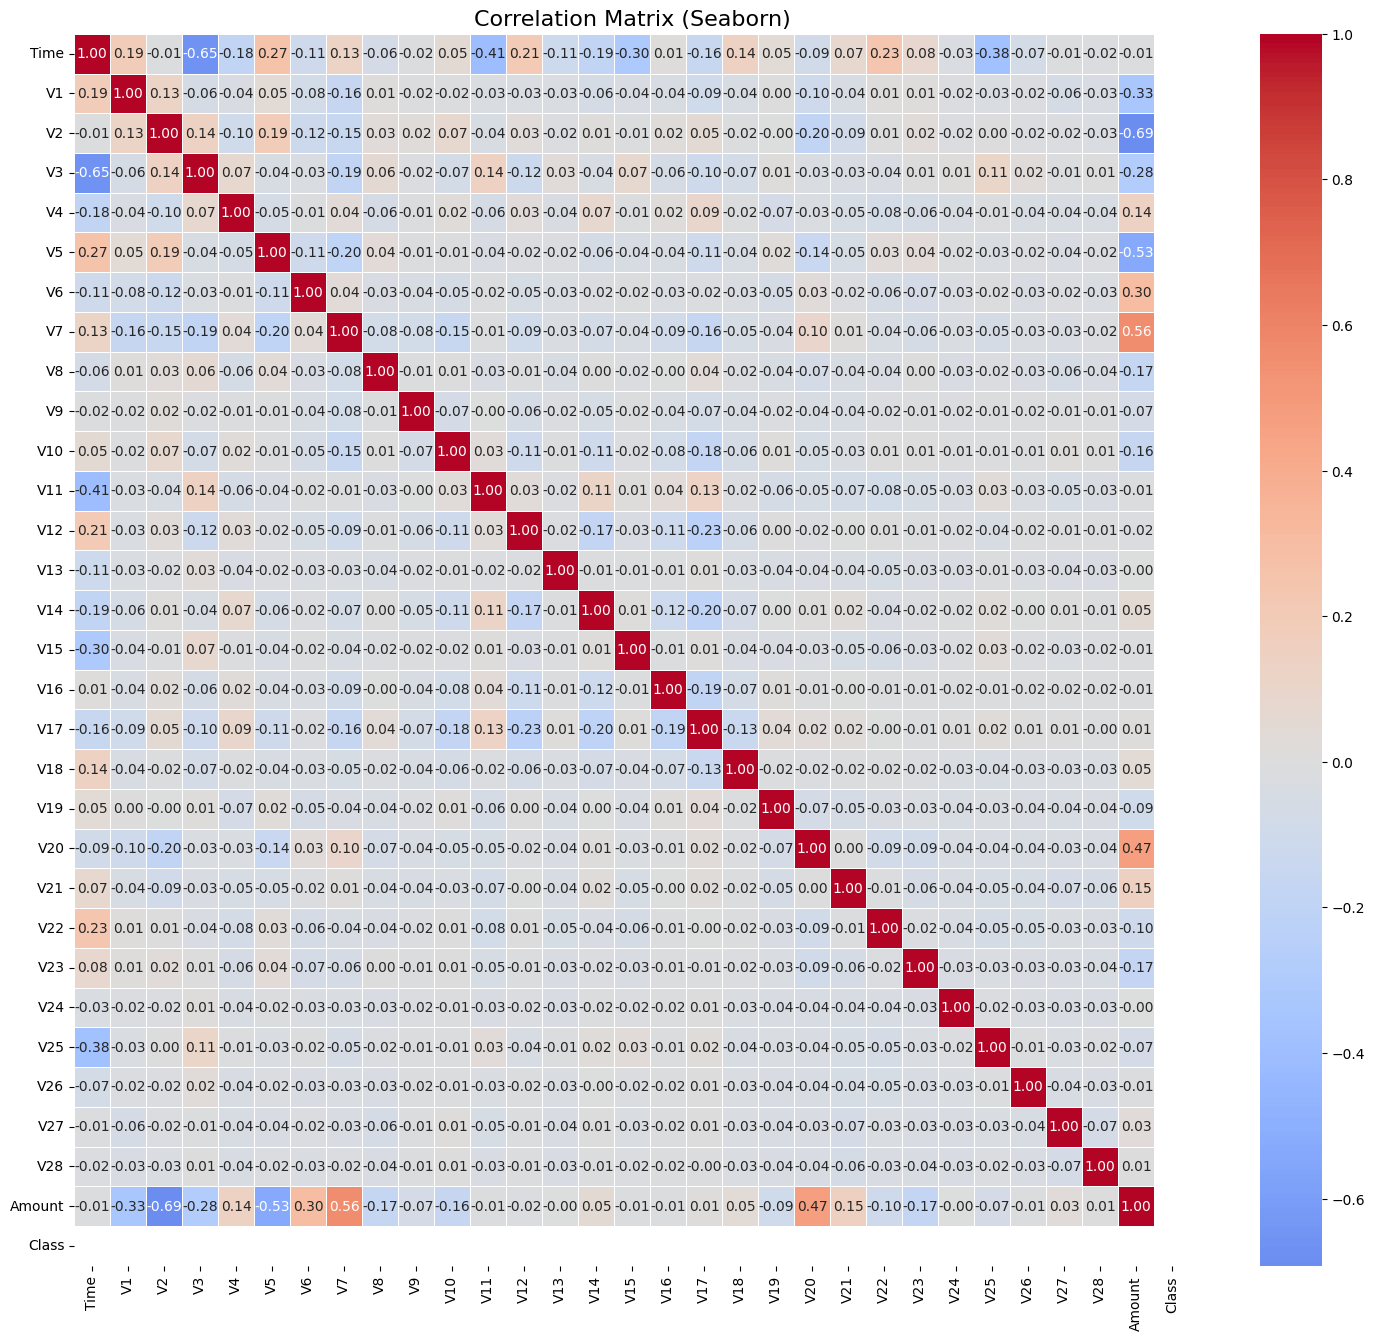

In [53]:
correlation_matrix = non_fraud_corr.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix (Seaborn)', fontsize=16)
plt.show()

In [54]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['Class'])
y = df['Class']

mi_scores = mutual_info_classif(X, y, discrete_features=False)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)
print(mi_df)


   Feature  MI Score
17     V17  0.008281
14     V14  0.008172
12     V12  0.007636
10     V10  0.007554
11     V11  0.006850
16     V16  0.006162
4       V4  0.004990
3       V3  0.004968
18     V18  0.004334
9       V9  0.004289
7       V7  0.003969
2       V2  0.003248
21     V21  0.002464
27     V27  0.002464
5       V5  0.002397
6       V6  0.002396
1       V1  0.002140
8       V8  0.001922
28     V28  0.001871
0     Time  0.001863
29  Amount  0.001483
19     V19  0.001474
20     V20  0.001205
23     V23  0.000765
24     V24  0.000643
26     V26  0.000502
25     V25  0.000499
13     V13  0.000407
22     V22  0.000353
15     V15  0.000317


### Based on all these analyis I am dropping 22 and 13

In [55]:
df_new=df.drop(columns=['V22','V13'])

In [56]:
df_new.to_csv("importantcolumns.csv",index=False)